# Основы Scikit-learn (PyLounge)



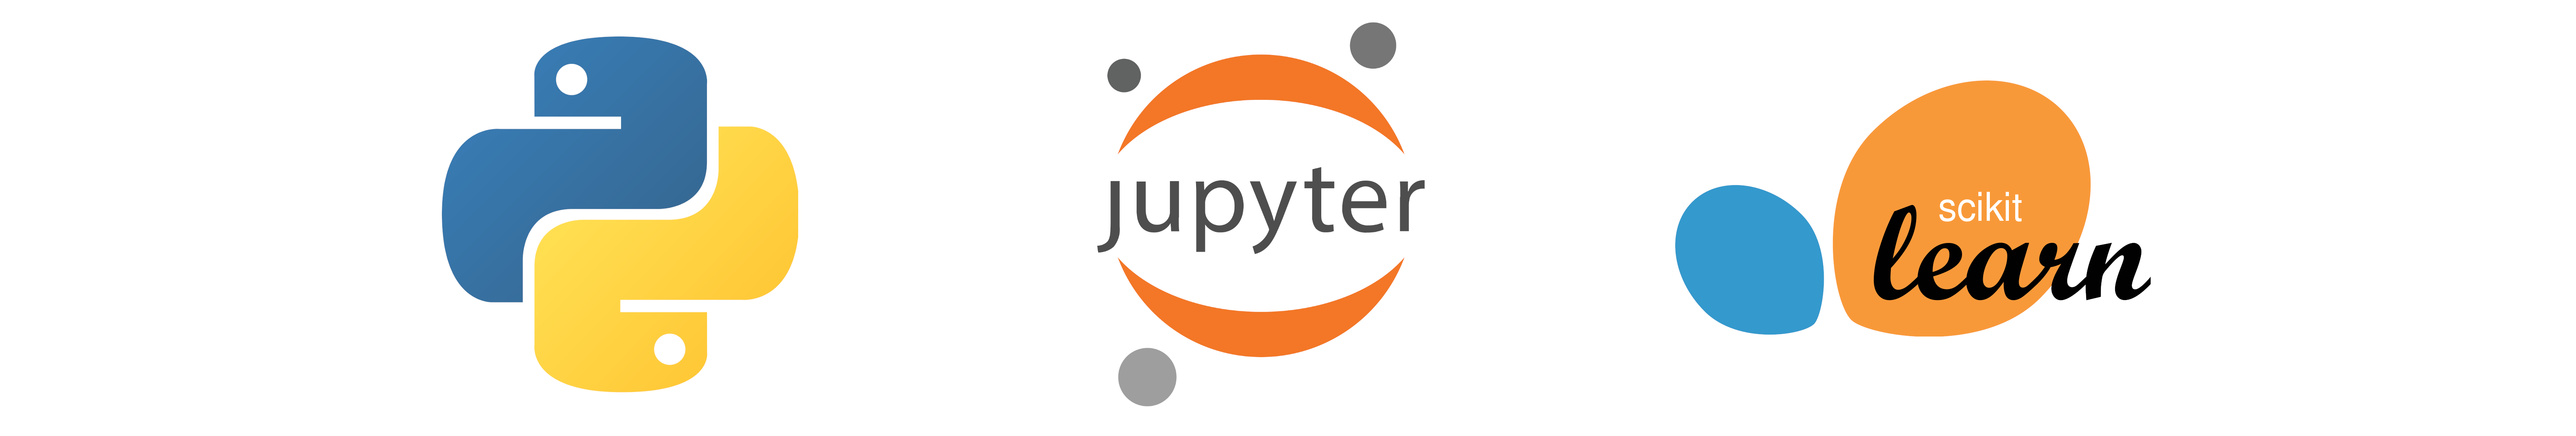

## Введение

**Scikit-learn** - это библиотека языка Python для решения задач _Data Science_ и _Machine Learning_. Включает в себя различные **алгоритмы классического машинного обучения**, **функции обработки (подготовки) данных** (стандартизация, нормализация, бинаризация, векторизация, преобразования), а также **методы для работы с моделями** (кросс-валидация, подбор гиперпараметров, метрики оценки качества).

_Официальная документация:_ https://scikit-learn.org/stable/

Scikit-learn **содержит**:
* **Алгоритмы классификации**:
 * Линейные модели, например, логистическая регрессия, Ridge;
 * Метод опорных векторов SVM (Support Vector Machine);
 * Метод k-ближайших соседей (k–neighbors);
 * Случайный лес (Random Forest);
 * Деревья решений (Decision Trees);
 * Наивный байесовский классификатор (NaiveBayes);
 * Линейный дискриминантный анализ (Linear Discriminant Analysis);
 * Нейронные сети(Neural network);
* **Алгоритмы регрессии**:
 * Линейные модели, например, линейная регрессия, Lasso, Elastic-netи многие другие [3];
 * Метод опорных векторов SVM (Support Vector Machine);
 * Метод k-ближайших соседей (k–neighbors);
 * Ансамблевые методы, например, AdaBoost, Gradient Tree Boosting, Stacked Generalizationи многие другие [4];
 * Случайный лес (Random Forest);
 * Деревья решений (Decision Trees);
 * Нейронные сети(Neural network).
* **Алгоритмы кластеризации**:
 * Метод k-средних k–Means;
 * Спектральная кластеризация (Spectral clustering);
 * Сдвиг среднего значения (Meanshift);
 * Метод распространения близости (Affinitypropagation);
 * Метод Варда(Ward hierarchical clustering);
 * Агломеративные методы (Agglomerative clustering);
 * Основанная на плотности пространственная кластеризация для приложений с шумами DBSCAN;
 * Сбалансированное итеративное сокращение и кластеризация с помощью иерархий BIRCH.
* **Методы уменьшения размерностей**:
 * Метод главных компонент PCA;
 * Латентное размещение Дирихле LDA;
 * Факторный анализ(Factor analysis).
* **Обработка данных**:
 * Стандартизация и нормализация данных, например, StandardScaller, MinMaxScaller;
 * Нелинейные преобразования, например, отображение на равномерное распределение (QuantileTransform) и нормальное распределение 
 * Преобразование категориальных данных в числовые, например, OrdinalEncoder, OneHotEncoder;
 * Преобразование непрерывных данных в дискретные (Discretization);
 * БинаризацияFeature binarization;
 * Заполнения пустых значений, например, PolynomialFeatures;
 * Векторизация, например, DictVectorizer, CountVectorizer, TfIdftransformer;
* **Работа с моделями**:
 * Кросс-валидация (cross validation);
 * Настройка гиперпараметров, например,GridSearchCV;
 * Метрики для оценки модели;
 * Сохранение моделей;
 * Валидация моделей, например, Validation curve, Learning curve.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error, mean_absolute_error


# Получаем данные из файла 

In [2]:

df = pd.read_excel('Churn_Modelling.xlsx')


In [12]:
df.head(20)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0           1    15634602   Hargrave          619    France  Female   42   
1           2    15647311       Hill          608     Spain  Female   41   
2           3    15619304       Onio          502    France  Female   42   
3           4    15701354       Boni          699    France  Female   39   
4           5    15737888   Mitchell          850     Spain  Female   43   
5           6    15574012        Chu          645     Spain    Male   44   
6           7    15592531   Bartlett          822    France    Male   50   
7           8    15656148     Obinna          376   Germany  Female   29   
8           9    15792365         He          501    France    Male   44   
9          10    15592389         H?          684    France    Male   27   
10         11    15767821     Bearce          528    France    Male   31   
11         12    15737173    Andrews          497     Spain    Male   24   
12         13    15632264        Kay          476    France  Female   34   
13         14    15691483       Chin          549    France  Female   25   
14         15    15600882      Scott          635     Spain  Female   35   
15         16    15643966    Goforth          616   Germany    Male   45   
16         17    15737452      Romeo          653   Germany    Male   58   
17         18    15788218  Henderson          549     Spain  Female   24   
18         19    15661507    Muldrow          587     Spain    Male   45   
19         20    15568982        Hao          726    France  Female   24   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2       0.00              1          1               1   
1        1   83807.86              1          0               1   
2        8  159660.80              3          1               0   
3        1       0.00              2          0               0   
4        2  125510.82              1          1               1   
5        8  113755.78              2          1               0   
6        7       0.00              2          1               1   
7        4  115046.74              4          1               0   
8        4  142051.07              2          0               1   
9        2  134603.88              1          1               1   
10       6  102016.72              2          0               0   
11       3       0.00              2          1               0   
12      10       0.00              2          1               0   
13       5       0.00              2          0               0   
14       7       0.00              2          1               1   
15       3  143129.41              2          0               1   
16       1  132602.88              1          1               0   
17       9       0.00              2          1               1   
18       6       0.00              1          0               0   
19       6       0.00              2          1               1   

    EstimatedSalary  Exited  
0         101348.88       1  
1         112542.58       0  
2         113931.57       1  
3          93826.63       0  
4          79084.10       0  
5         149756.71       1  
6          10062.80       0  
7         119346.88       1  
8          74940.50       0  
9          71725.73       0  
10         80181.12       0  
11         76390.01       0  
12         26260.98       0  
13        190857.79       0  
14         65951.65       0  
15         64327.26       0  
16          5097.67       1  
17         14406.41       0  
18        158684.81       0  
19         54724.03       0

In [13]:
df.tail(3)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [3]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [ ]:
df.info()

In [4]:

fig = px.histogram(df, 
                   y="Gender", 
                   color='Exited', 
                   text_auto=True,
                   width=700,
                   height=300,
                   title='Exited by gender')
fig.show()
exit_by_gender=df.groupby(['Exited','Gender'])['CustomerId'].count()
exit_by_gender_df=pd.DataFrame(exit_by_gender)
percent=[]
for c in exit_by_gender_df['CustomerId']:
    p=(c/df.shape[0])*100
    percent.append(round(p))
exit_by_gender_df=exit_by_gender_df.rename(columns = {'CustomerId':'Customers'})
exit_by_gender_df['percent%']=percent
exit_by_gender_df.T

Exited         0            1     
Gender    Female  Male Female Male
Customers   3404  4559   1139  898
percent%      34    46     11    9

In [5]:
fig = px.histogram(df, 
                   y="Geography", 
                   color='Exited', 
                   text_auto=True,
                   width=700,
                   height=300,
                   title='Exited by Geography')
fig.show()
exit_by_geography=df.groupby(['Exited','Geography'])['CustomerId'].count()
exit_by_geography_df=pd.DataFrame(exit_by_geography)
percent=[]
for c in exit_by_geography_df['CustomerId']:
    p=(c/df.shape[0])*100
    percent.append(round(p))
exit_by_geography_df=exit_by_geography_df.rename(columns = {'CustomerId':'Customers'})
exit_by_geography_df['percent%']=percent
exit_by_geography_df.T

Exited         0                    1              
Geography France Germany Spain France Germany Spain
Customers   4204    1695  2064    810     814   413
percent%      42      17    21      8       8     4

In [6]:
fig = px.imshow(round(df.corr(),1),
                text_auto=True,
                title='Correlation Heatmap')
fig.show()

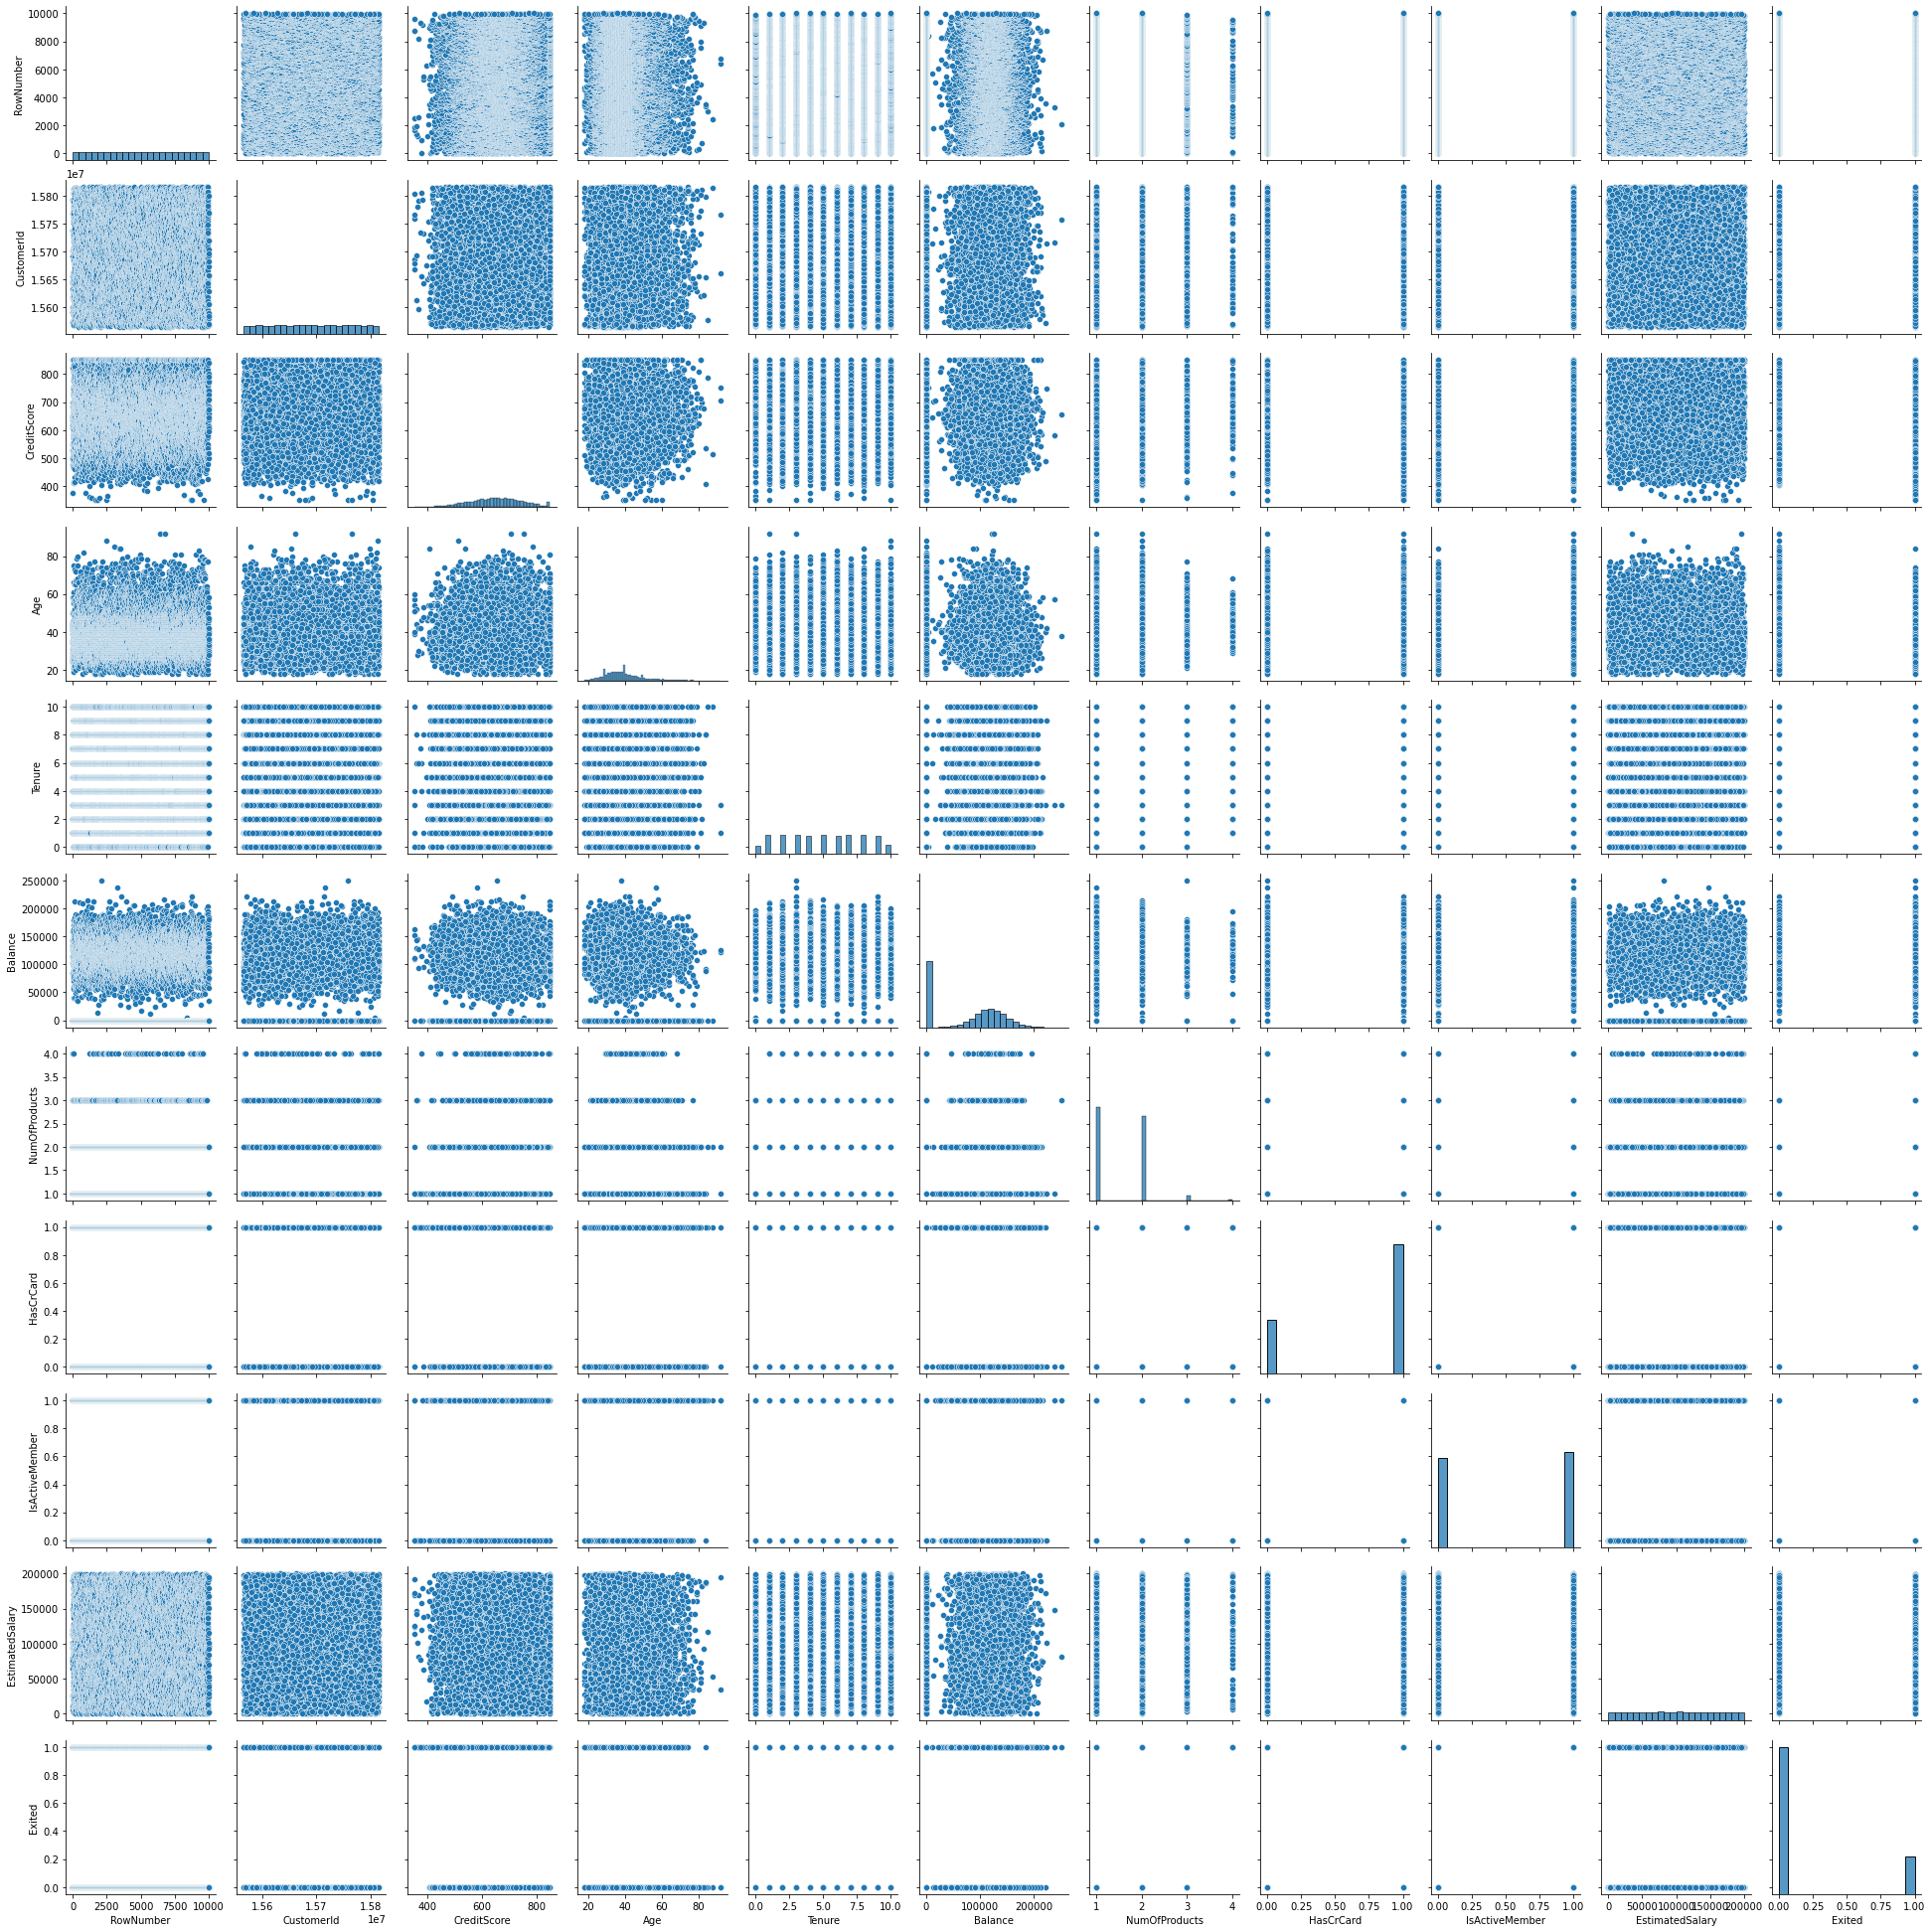

In [8]:
sns.pairplot(df)

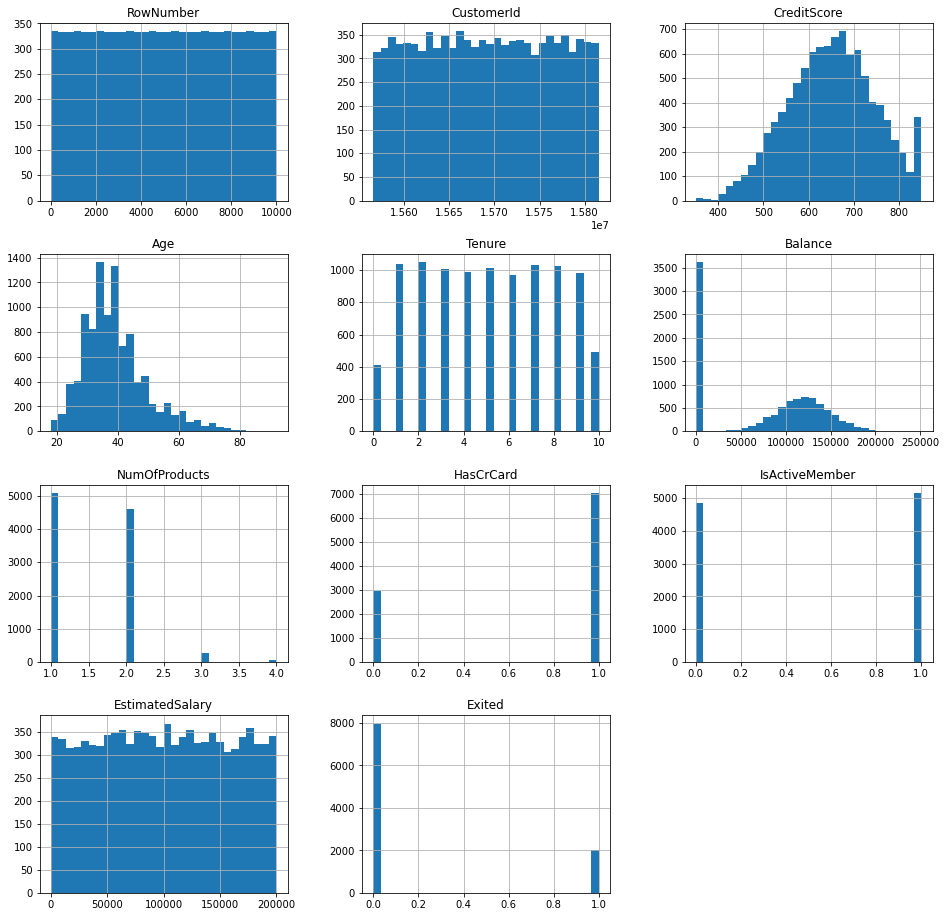

In [19]:
histograms = df.hist(figsize=(16,16), bins=30)

## Ядерная оценка плотности распределения

**Ядерная оценка плотности распределения** – это всего лишь подгонка распределения вероятности. Но прежде, чем обсуждать ядерную оценку плотности, давайте обсудим, каково простейшее решение данной задачи, поскольку его очень легко упустить из виду при разборе всех наших сложных методов машинного обучения.

Она прекрасно работает для дискретных вероятностей, будучи оценкой максимума функции правдоподобия. Если же встречаются непрерывные вероятности, как в случае данных, рассматриваемых в этом курсе, нам необходимо распределить наши данные по участкам. Правда, это не самый лучший вариант, когда нам нужна какая-то гладкая кривая.

Один из способов – просто посмотреть на распределение данных и выбрать количество компонент, равное количество пиков, различимых на гистограмме.

Другой способ – использовать гауссианы с одной и той же дисперсией h, установить количество гауссиан равным количеству точек данных и использовать для обработки алгоритм гауссовой смеси распределений:
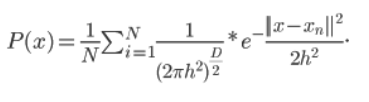

Величина h в этом случае называется размером окна. Разумеется, вам придётся поэкспериментировать, чтобы найти подходящий размер окна для вашего распределения.

Преимуществом здесь является тот факт, что исчезает необходимость подбирать количество компонент (кластеров).

C:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



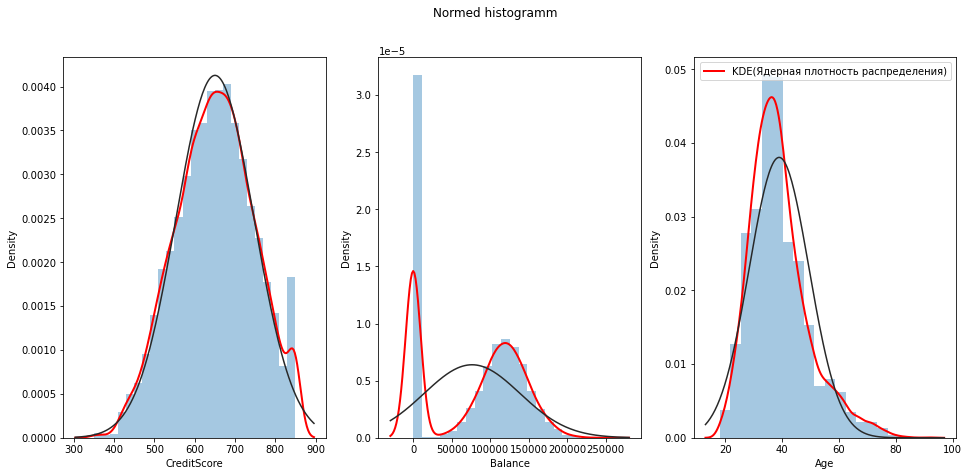

In [20]:
from scipy.stats import norm
fig, axes = plt.subplots(1, 3, figsize=(16, 7))

fig.suptitle('Normed histogramm')

sns.distplot(df['CreditScore'],ax=axes[0],bins = 25,  fit=norm,  kde_kws={"color": "r", "lw": 2, "label": "KDE(Ядерная плотность распределения)"})
sns.distplot(df['Balance'], ax=axes[1], fit=norm,  kde_kws={"color": "r", "lw": 2, "label": "KDE"})
sns.distplot(df['Age'], ax=axes[2], bins = 20, fit=norm,  kde_kws={"color": "r", "lw": 2, "label": "KDE(Ядерная плотность распределения)"})
plt.legend();
# fig = sns_plot.get_figure()

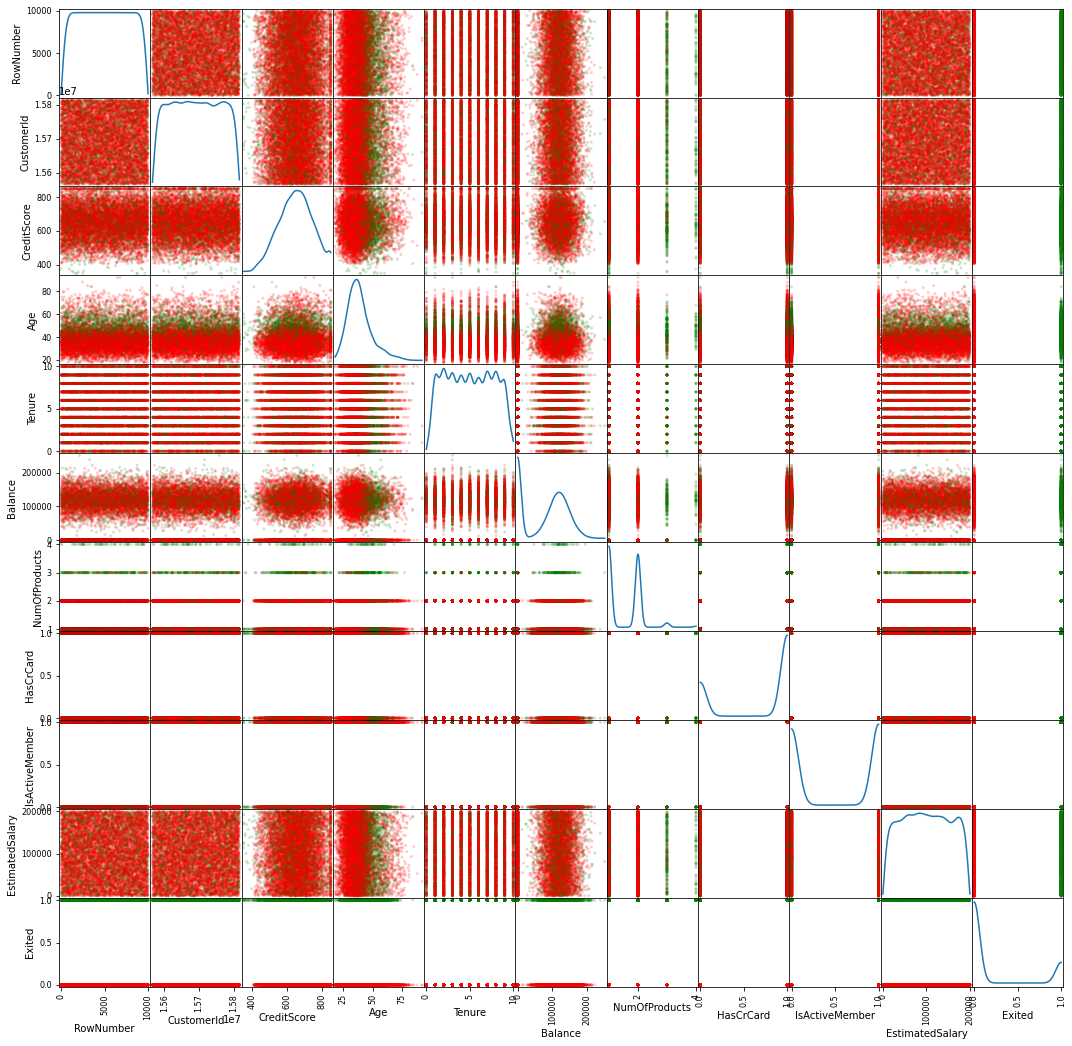

In [25]:
from pandas.plotting import scatter_matrix
colora = {1:"green", 0: "red"}
scatter_matrix(df,figsize=(18,18), diagonal="kde", c =df["Exited"].replace(colora), alpha= 0.2);

## Разделение данных на обучающую и тестовую выборку

Разделение данных на обучающую и тестировую выборку является важной частью проверки того, насколько хорошо работает модель. Изначально она обучается на отдельных данных (обучающей выборке), а замет проверяем качество работы модели на тестовой выборке. Таким образом, можно измерить способность модели обобщать новые данные:

In [11]:
from sklearn.model_selection import train_test_split

# train_test_split разбивает выбору случайныи образом на 2 подвыборки: обучающую и тестовую
# запускам разбиение с параметрами по умолчанию

# y = df["Exited"].replace({0:1, 1:-1})
y = df["Exited"]
x = df.drop(['RowNumber', 'CustomerId', "Surname", "Geography", "Gender", "Exited"], axis = 1)

# Кроме того, мы можем явно задать некоторые специальные параметры
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) 

_test_size, train_size_ - необязательные параметры, отвечающие за количество данных в %, которые пойдут в обучающую или тестовую выборки.

_random_state_ - отвечает за перемешивание данных. Туда передают какое-либо целочисленное занчение, чтобы при каждом запуске выборка мешалась одинаково. Это гарантирует воспроизводимость эксеремента.

Кроме этого у функции _train_test_split_ есть ещё несколько параметров по умолчанию (см. документацию).

## Обработка данных

Перед тем, как скармливать данные на обучение, их необходимо некоторым образом приготовить. "Рецепт готовки" зависит от особенности конкретной модели, однако чаще всего используют следующие методы из пакета `sklearn.preprocessing`

### Стандартизация (Standardization)

Стандартизация – техника преобразования значений признака (Feature), адаптирующая признаки с разными диапазонами значений. Подразумевает приравнивание среднего значения к нулю и/или приравнивание стандартного отклонения к единице. Данный вид шкалирования стремится привести данные к нормальному распределению. 

Другими словами. Стандартизированные данные содержат ту же информацию, но имеют среднее значение 0 и отклонение 1. После масштабирования данных математическая природа алгоритмов позволяет лучше с ними работать (например SVM и метод K-means).

In [18]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(x_train) 
# standardized_X = scaler.transform(x_train)

# print('До стандартизации:')
# print(x_train[:3])
# print()
# print('После стандартизации:')
# standardized_X[:3]

# пример с бостонскими домами является не самым лучшим для демонстрации стандлартизации, однако суть остаётся прежней

### Нормализация (Normalization)

В машинном обучении нормализацией называют метод предобработки числовых признаков в обучающих наборах данных с целью приведения их к некоторой общей шкале без потери информации о различии диапазонов. Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения. 

Предположим, у вас есть набор данных с различными единицами: температура в Кельвинах, относительная влажность и день года. Мы можем увидеть следующие диапазоны для каждой функции.
Температура: от 270 K до 305 K
Влажность: от 0 до 1 (т. е. Влажность 30%, равная 0,3)
День года: от 0 до 365

Когда вы смотрите на эти значения, вы интуитивно нормализуете значения. Например, вы знаете, что увеличение на 0,5 (на 50%) для влажности намного более значимо, чем увеличение на 0,5 для температуры. И если мы не будем нормализовать эти данные, наш алгоритм может научиться использовать температуру в качестве основного предиктора просто потому, что масштаб является наибольшим (и, следовательно, изменения в значениях температуры наиболее значительны для алгоритма). Нормализация данных позволяет всем признакам вносить одинаковый вклад (или, что более точно, позволяет добавлять признаки в зависимости от их важности, а не их масштаба).

Нормализацию требуют, например, алгоритмы логистическая регрессия, нейронные сети, PCA.

In [46]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(x_test)
normalized_X = scaler.transform(x_test)



# print('До нормализации:')
# print(x_test[:3])
# print()
# print('После нормализации:')
# normalized_X[:3]

## Приведение к бинарному виду (Binarization)

Бинаризуйте данные (установите значения функций равными 0 или 1) в соответствии с пороговым значением.

Например, если мы выберем пороговое значение = 0,5, то значение набора данных выше этого станет 1, а ниже этого станет 0. Поэтому мы можем назвать его бинаризацией данных или пороговым значением данных. Этот метод полезен, когда у нас есть вероятности в нашем наборе данных и мы хотим преобразовать их в четкие значения.


In [ ]:
# from sklearn.preprocessing import Binarizer

# X = 10 * np.random.random((5,5)) - 5

# binarizer = Binarizer(threshold = 0.0).fit(X) # в данном случае порог 0.0
# binary_X = binarizer.transform(X)

# print('До бинаризации:')
# print(X[:5])
# print()
# print('После бинаризации:')
# binary_X[:5]


### Grid Search

GridSearch — поиск лучших параметров в фиксированной сетке возможных значений. CV – перекрёстная проверка (кросс-валидация, Cross-validation), метод, который показывает, что модель не переобучилась.

Параметры GridSearchCV:

estimator — модель которую хотим обучать (алгоритм);

param_grid — передаем какие параметры хотим подбирать, GridSearchCV на всех параметрах попробует сделать обучение;

CV — сколько разрезов кросс-валидации мы ходим сделать;

scoring — выбор метрики ошибки (для разных задач можно выбрать разные функции ошибки).

## Загрузка и настройка моделей

Работа с моделяит начинается с импорта необходимых нам пакетов, классов и функций. 
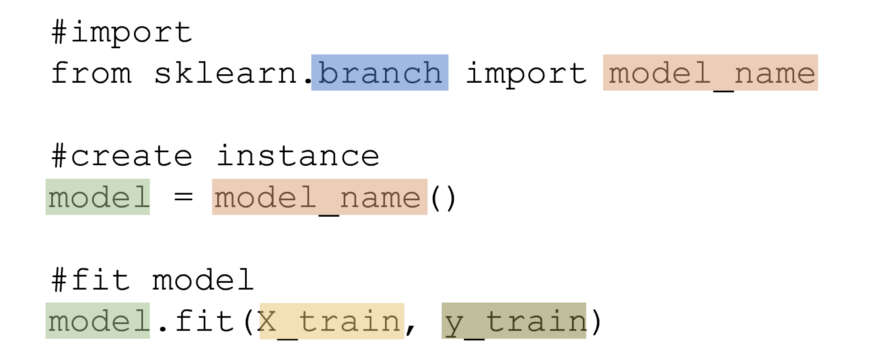

Рассмотрим работу моделей для обучения с учителем и без учителя.

При обучении с учителем модель обучается на размеченном наборе данных и предсказывает ответы, которые используются для оценки точности алгоритма на обучающих данных. 

При обучении без учителя модель использует неразмеченные данные, из которых алгоритм самостоятельно пытается извлечь признаки и зависимости.

Обучение модели - это обработка набору данных с использованием некоторого алгоритма, который позволяет анализировать предоставленные данные и запоминать полученные результаты, в некотором смысле делать выводы на основе свойств данных.

В Scilit-learn обучение модели происходит посредством вызова её метода `fit` в который в качестве аргумента передаётся набор данных обучающей выборки.

#### Линейная регрессия (Linear Regression)

Линейная регрессия в машинном обучении Линейная регрессия (Linear regression) — модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

$$ y = B_{0} + B_{1} \cdot x $$

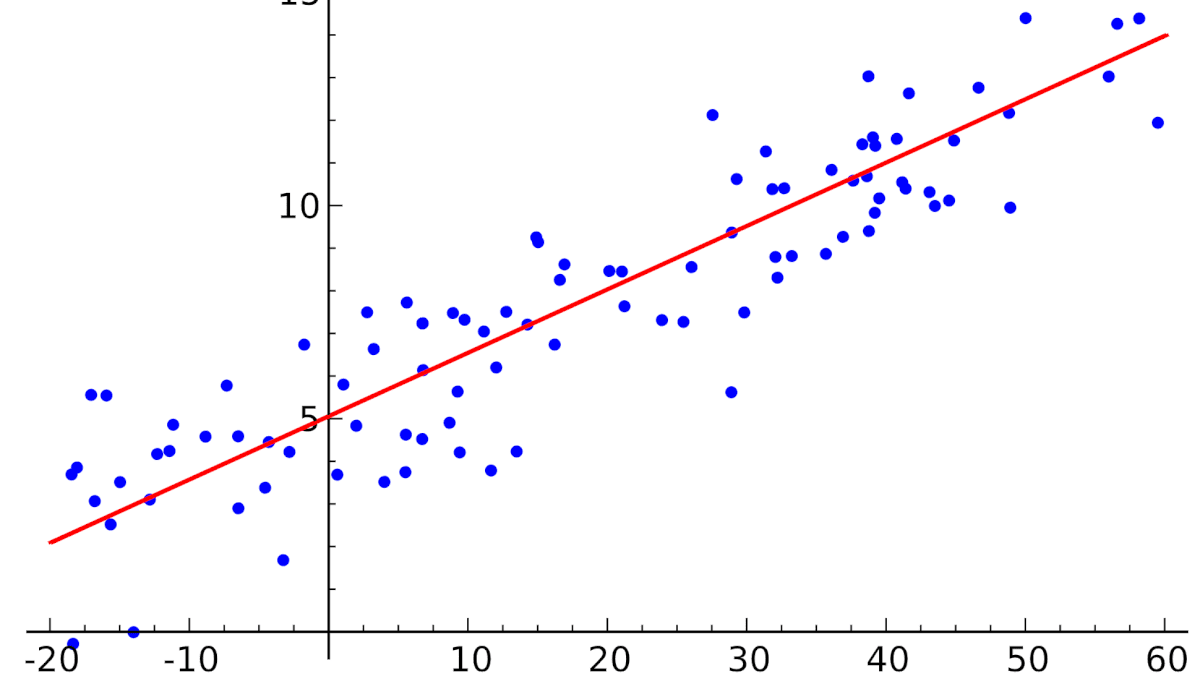

In [13]:
from sklearn.linear_model import LinearRegression


# создаём объект модели, настраиваем парметры (normalize=True)
lr = LinearRegression(normalize=True)

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Model score: ', lr.score(x_test, y_test))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

# print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred ))
# print('Classification_report:', classification_report(y_test, y_pred))
# accuracy_score(y_test, y_pred)
# print('Recall:', recall_score(y_test, y_pred, average='micro'))
y_pred

Model score:  0.1293924371940215
MAE:  0.28798348661730966
MSE:  0.13658313694062785


array([0.23344994, 0.14615848, 0.29068517, ..., 0.20975944, 0.39707656,
       0.3921098 ])

#### Метод опорных векторов (SVM, Support Vector Machine)

Работа метода опорных векторов заключается в рисовании линии между разными кластерами точек, которые нужно сгруппировать в классы. С одной стороны линии будут точки, принадлежащие одному классу, с другой стороны — к другому классу.

Классификатор будет пытаться увеличить расстояние между рисуемыми линиями и точками на разных сторонах, чтобы увеличить свою «уверенность» определения класса. Когда все точки построены, сторона, на которую они падают — это класс, которому эти точки принадлежат.

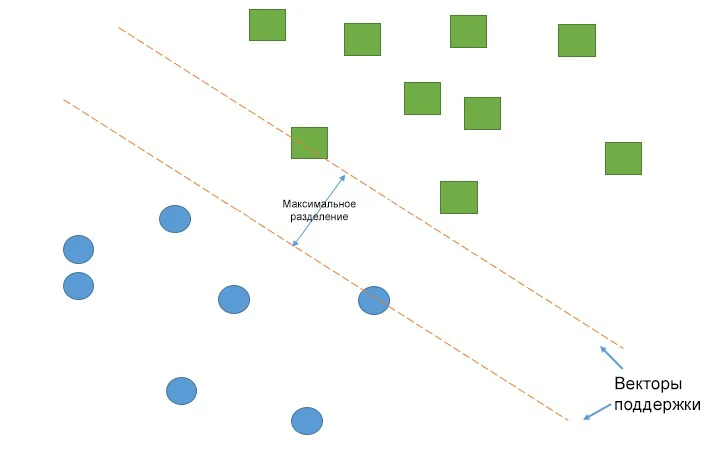

In [22]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train) 
standardized_X = scaler.transform(x_train)

grid = GridSearchCV(svm.SVC(gamma="auto"), {"C": list(range(1,30,9)), "kernel": ['rbf', 'sigmoid']}, return_train_score=False)
grid.fit(standardized_X, y_train)
df_r = pd.DataFrame(grid.cv_results_)
df_r[["param_C", "param_kernel", "mean_test_score", "std_test_score"]]

param_C param_kernel  mean_test_score  std_test_score
0       1          rbf         0.847910        0.005114
1       1      sigmoid         0.674627        0.014494
2      10          rbf         0.847910        0.006427
3      10      sigmoid         0.664179        0.016282
4      19          rbf         0.844328        0.007648
5      19      sigmoid         0.660149        0.017695
6      28          rbf         0.840448        0.006764
7      28      sigmoid         0.662388        0.015247

In [23]:

clf = svm.SVC(kernel=grid.best_params_["kernel"], C=grid.best_params_["C"], gamma="auto")
clf.fit(standardized_X, y_train)


scaler = StandardScaler().fit(x_test) 
standardized_X = scaler.transform(x_test)

y_pred = clf.predict(standardized_X )

print('Score: ', clf.score(standardized_X , y_test))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred ))
# print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred ))

y_pred

Score:  0.8587878787878788
MSE:  0.1412121212121212
MAE:  0.1412121212121212


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
print('Classification_report:', classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)
print('Recall:', recall_score(y_test, y_pred, average='micro'))

Classification_report:               precision    recall  f1-score   support

           0       0.86      0.98      0.92      2657
           1       0.80      0.37      0.50       643

    accuracy                           0.86      3300
   macro avg       0.83      0.67      0.71      3300
weighted avg       0.85      0.86      0.84      3300

Recall: 0.8587878787878788


#### Наивный байесовский классификатор (Naive Bayes)

Классификатор вычисляет вероятность принадлежности объекта к какому-то классу. Эта вероятность вычисляется из шанса, что какое-то событие произойдёт, с опорой на уже на произошедшие события.

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print('Score: ', gnb.score(x_test, y_test))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred ))
# print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred ))
y_pred

Score:  0.793939393939394
MSE:  0.20606060606060606
MAE:  0.20606060606060606


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [102]:
print( classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)
print('Recall:', recall_score(y_test, y_pred, average='micro'))

              precision    recall  f1-score   support

          -1       0.36      0.08      0.13       643
           1       0.81      0.97      0.88      2657

    accuracy                           0.79      3300
   macro avg       0.59      0.52      0.51      3300
weighted avg       0.73      0.79      0.74      3300

Recall: 0.793939393939394


In [15]:
gnb.predict_proba(x_test)

array([[0.86071544, 0.13928456],
       [0.84084083, 0.15915917],
       [0.83464137, 0.16535863],
       ...,
       [0.86395823, 0.13604177],
       [0.4689829 , 0.5310171 ],
       [0.68980809, 0.31019191]])

#### Метод K-средних (K-Means)

Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

![image.png](attachment:image.png)

In [22]:
from sklearn.cluster import KMeans

scaler = StandardScaler().fit(x_train) 
standardized_X = scaler.transform(x_train)

standardized_test_X = scaler.transform(x_test)

k_means = KMeans(n_clusters = 2, random_state = 42, n_init=20, max_iter=400, algorithm="auto", tol=0.0001, verbose=0)
k_means.fit(standardized_X)

y_pred = k_means.predict(standardized_test_X,)
y_pred

array([4, 5, 0, ..., 3, 2, 4])

Score:  -16454.991054436712
MSE:  12.773939393939393
MAE:  2.901818181818182
MAPE:  1.115255034996112e+16


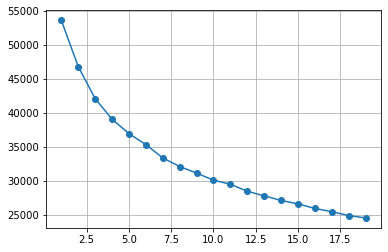

In [20]:
print('Score: ', k_means.score(standardized_test_X, y_test))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred ))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred ))
k_means.cluster_centers_

K = range(1, 20)
models = [KMeans(n_clusters = i, random_state = 42).fit(standardized_X) for i in K]

dist = [i.inertia_ for i in models]

plt.plot(K, dist, marker="o")
plt.grid()
plt.show()

In [108]:
print( classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)
print('Recall:', recall_score(y_test, y_pred, average='micro'))

              precision    recall  f1-score   support

           0       0.79      0.57      0.66      2657
           1       0.17      0.37      0.24       643

    accuracy                           0.53      3300
   macro avg       0.48      0.47      0.45      3300
weighted avg       0.67      0.53      0.58      3300

Recall: 0.5309090909090909


#### Метод K-ближайших соседей (K Nearest Neighbors)

Этот метод работает с помощью поиска кратчайшей дистанции между тестируемым объектом и ближайшими к нему классифицированным объектами из обучающего набора. Классифицируемый объект будет относится к тому классу, к которому принадлежит ближайший объект набора.

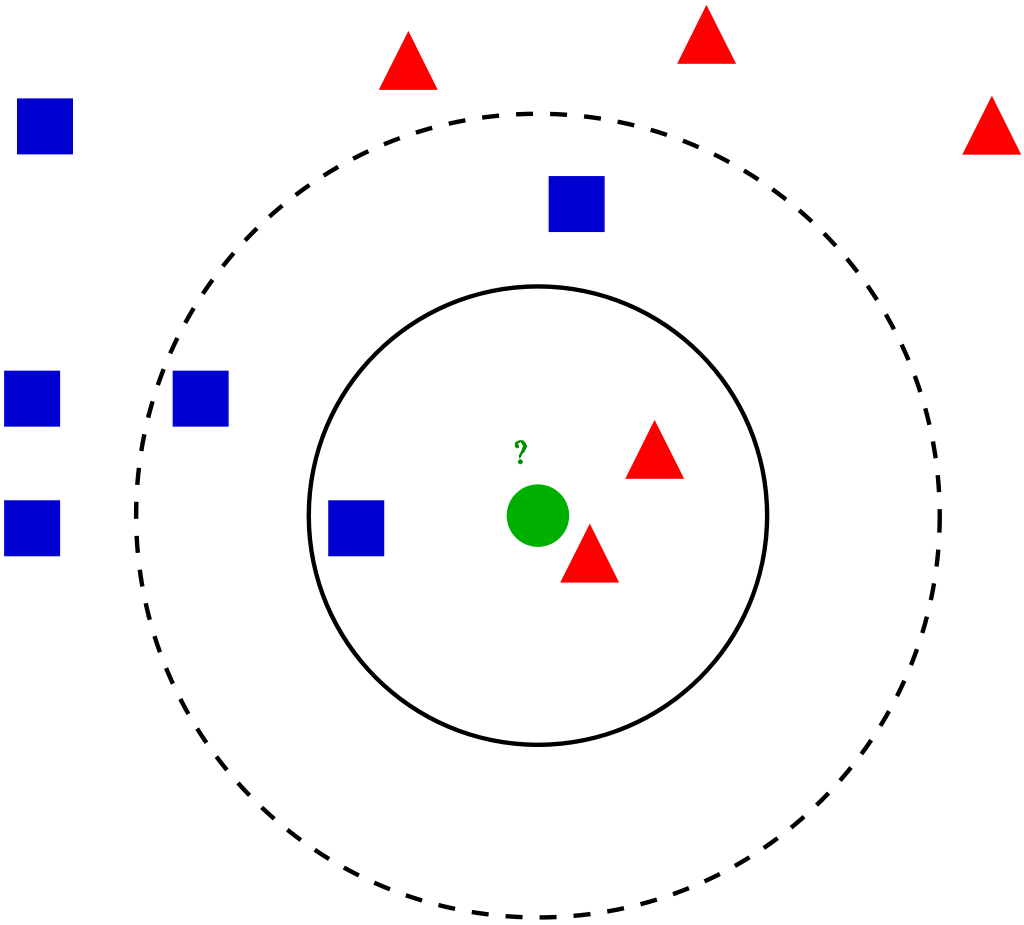

In [24]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV


knn = neighbors.KNeighborsClassifier()

# параметры, которые будем перебирать
params = {'n_neighbors':list(range(2, 50)), 'metric':['euclidean','cityblock']} 

grid = GridSearchCV(estimator = knn, param_grid = params)
grid.fit(x_train, y_train)

print(f"best_score = {grid.best_score_}")
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.metric)
df_r = pd.DataFrame(grid.cv_results_)
df_r[['param_n_neighbors', 'param_metric', 'mean_test_score', "std_test_score"]]



best_score = 0.7919402985074627
28
euclidean


param_n_neighbors param_metric  mean_test_score  std_test_score
0                  2    euclidean         0.771940        0.004367
1                  3    euclidean         0.735075        0.005235
2                  4    euclidean         0.776119        0.005524
3                  5    euclidean         0.757313        0.010356
4                  6    euclidean         0.780896        0.004591
..               ...          ...              ...             ...
91                45    cityblock         0.791940        0.000299
92                46    cityblock         0.791940        0.000299
93                47    cityblock         0.791940        0.000299
94                48    cityblock         0.791940        0.000299
95                49    cityblock         0.791940        0.000299

[96 rows x 4 columns]

In [25]:

knn = neighbors.KNeighborsClassifier(n_neighbors=28, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Score: ', knn.score(x_test, y_test))

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred ))
# print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred ))

# y_pred

Score:  0.8045454545454546
MSE:  0.19545454545454546
MAE:  0.19545454545454546
MAPE:  2729454319618.6777


In [66]:
print('Classification_report:', classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)
print('Recall:', recall_score(y_test, y_pred, average='micro'))

Classification_report:               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

Recall: 0.803


In [67]:
knn.predict_proba(x_test)

array([[0.9       , 0.1       ],
       [0.9       , 0.1       ],
       [0.83333333, 0.16666667],
       ...,
       [0.86666667, 0.13333333],
       [0.86666667, 0.13333333],
       [0.66666667, 0.33333333]])

## Оценка качества модели

Оценка качества модели выполняется с использованием тестировых выборки. Проеряется насколько точно модели предсказывает результат на тестовых данных, для которых известны правильные метки. Как правило используется модуль `sklearn.metrics` или встроенные методы модели.

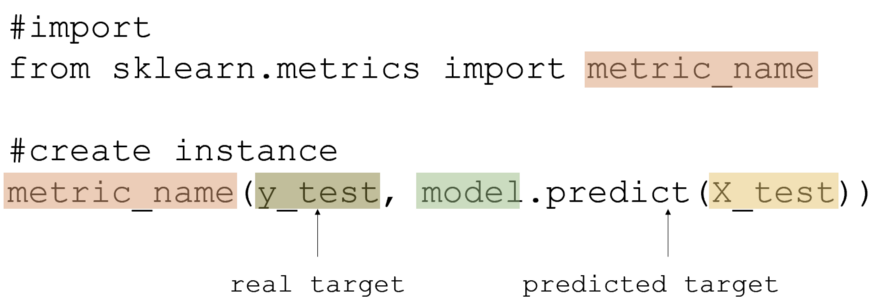

Для оценки качества используются различные метрики. Каждая из которых лучше подходит под определённый случай:

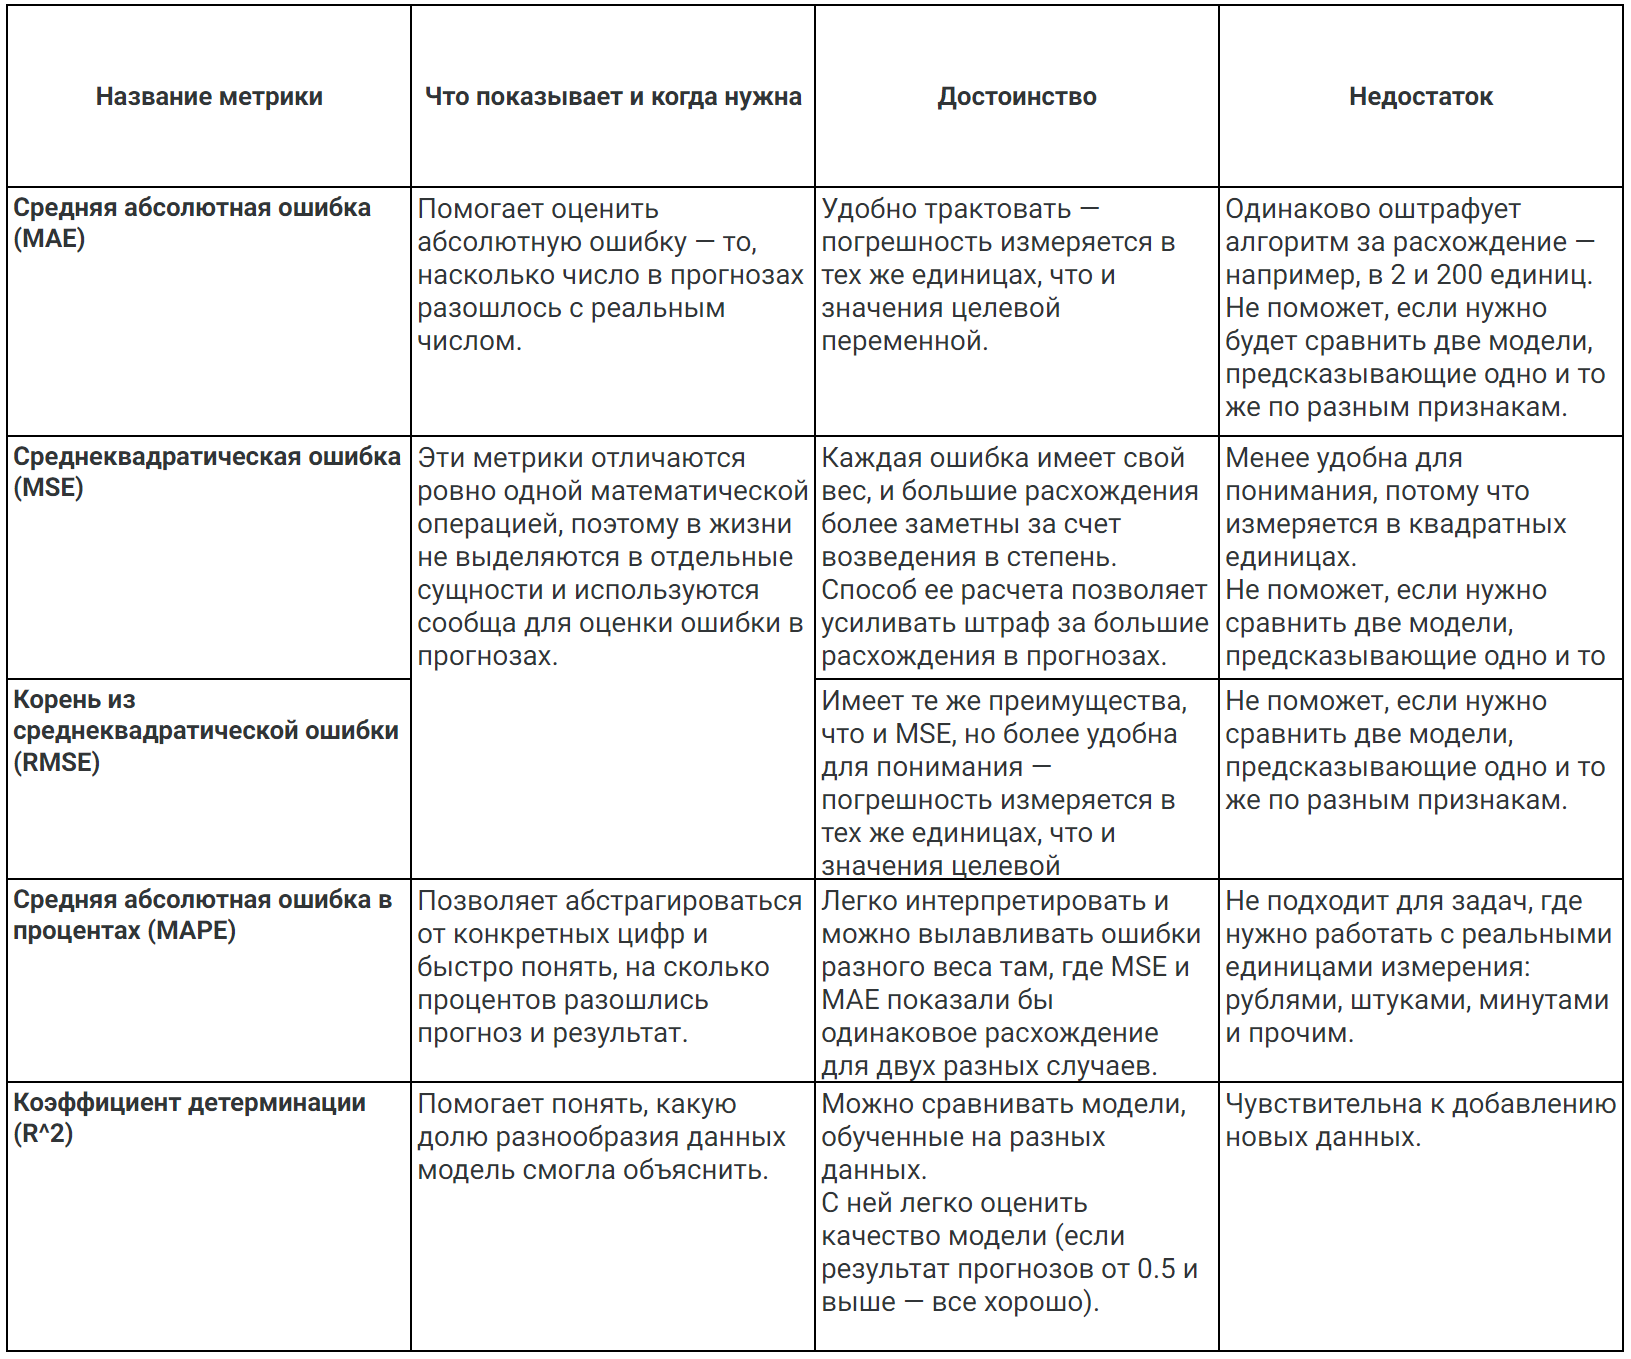




### Кросс-валидация

В основе метода лежит разделение исходного множества данных на k примерно равных блоков, например k=5. Затем на k − 1, т.е. на 4-х блоках, производится обучение модели, а 5-й блок используется для тестирования. Процедура повторяется k раз, при этом на каждом проходе для проверки выбирается новый блок, а обучение производится на оставшихся.

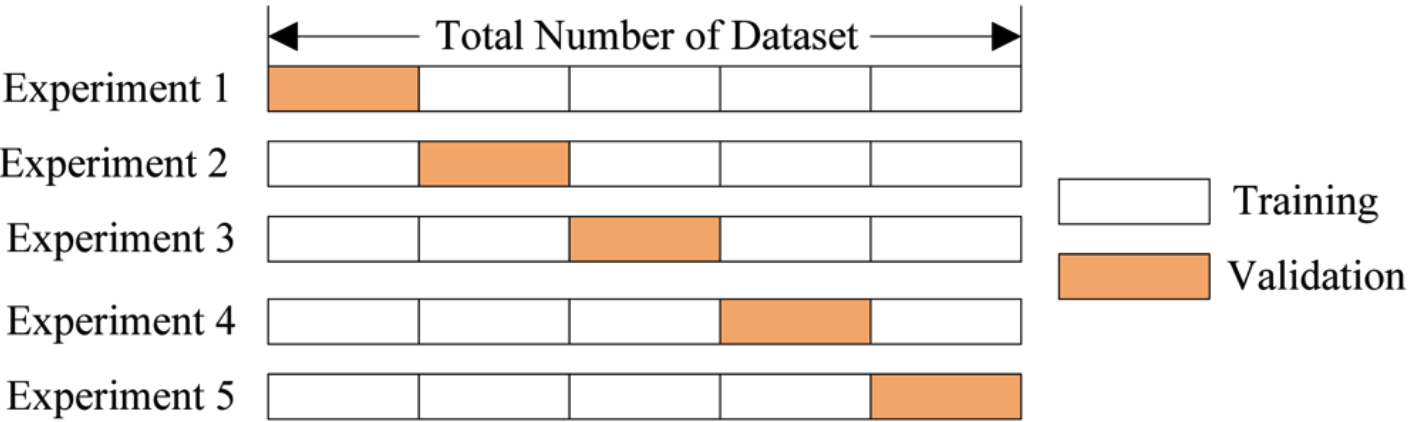

In [ ]:
# Cross Validation
# С помощью кросс-валидации эмулируется наличие тестовой выборки, которая не участвует в обучении, 
# но для которой известны правильные ответы.

from sklearn import svm
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('Score: ', clf.score(X_test, y_test))



from sklearn.model_selection import cross_validate

print('\nCross Validation:')
cv_results = cross_validate(clf, X, y, cv=3)

print(cv_results['test_score'])




### AUC - ROC Кривые

Полезным инструментом при прогнозировании вероятности бинарного исхода является **Кривая рабочих характеристик приемника или кривая ROC**.

Это график зависимости числа ложных срабатываний (ось X) от истинного положительного значения (ось Y) для ряда различных возможных пороговых значений от 0,0 до 1,0. Иными словами, он отображает частоту ложных срабатываний и частоту попаданий.

In [58]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [62]:
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target


y = label_binarize(y_test, classes=[0, 1])
n_classes = y.shape[1]


# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                     random_state=0)

In [63]:
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                 random_state=42))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

KeyError: 'key of type tuple not found and not a MultiIndex'

Другие функции и методы оценки смотрите в документации.

# pipeline


Пайплайн – 1. Последовательные стадии преобразования данных, предшествующие их загрузке в Модель (Model). 2. Класс библиотеки Scikit-learn, последовательно применяющий к исходным данным настраиваемые преобразования.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline


# RANDOM_STATE = 42
FIG_SIZE = (10, 7)


# features, target = load_wine(return_X_y=True)


# X_train, X_test, y_train, y_test = train_test_split(features, target,
#                                                     test_size=0.30,
#                                                     random_state=RANDOM_STATE)

# plt.hist(features);

Обучение без учителя (Unsupervised learning)
Метод главных компонент (PCA – principal component analysis)
Метод главных компонент позволяет заменить несколько исходных переменных на меньшее количество новых переменных. Новые искусственные переменные называются главными компонентами.

In [30]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())

std_clf.fit(x_train, y_train)

pred_test_std = std_clf.predict(x_test)

In [31]:
std_clf.named_steps

{'standardscaler': StandardScaler(),
 'pca': PCA(n_components=2),
 'gaussiannb': GaussianNB()}


Prediction accuracy for the standardized test dataset with PCA
80.52%



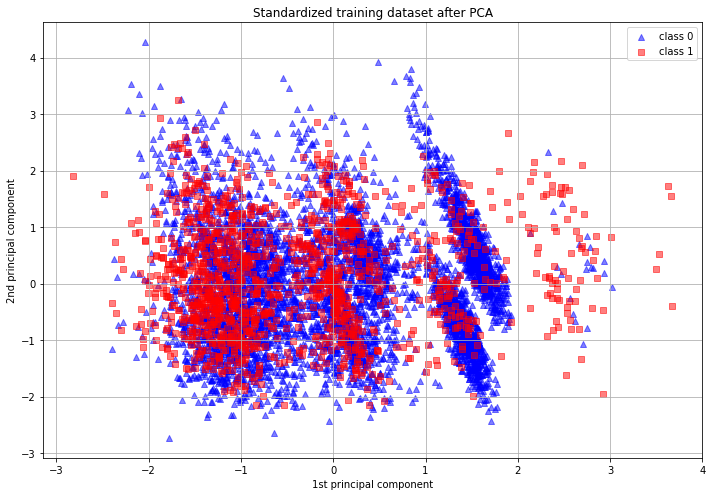

In [34]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

pca_std = std_clf.named_steps['pca']
pca_std

scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(x_train))


# делаем график
fig, ax2 = plt.subplots(ncols=1, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )
ax2.set_title('Standardized training dataset after PCA')

ax2.set_xlabel('1st principal component')
ax2.set_ylabel('2nd principal component')
ax2.legend(loc='upper right')
ax2.grid()

plt.tight_layout()

plt.show()

## Сохранение и загрузка модели

In [ ]:
# с помощью модуля pickle


iris = datasets.load_iris()
X, y = iris.data, iris.target


clf = svm.SVC()
clf.fit(X, y)  


import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(clf,f)

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)



clf2.predict(X[0:1])

In [ ]:
# с помощью joblib

iris = datasets.load_iris()
X, y = iris.data, iris.target

clf = svm.SVC()
clf.fit(X, y)  



import joblib

# save
joblib.dump(clf, "model.pkl") 

# load
clf2 = joblib.load("model.pkl")

clf2.predict(X[0:1])